In [1]:
import numpy as np
import networkx as nx
import dit
import itertools as it
from ast import literal_eval as fromstr
import matplotlib.pyplot as plt
%matplotlib inline

# Example Worlds

## First, a world with a couple of "essence kinds".

This world can be plausibly described as one with two "essence kinds": the one that stems from 0, and the one that stems from 5.

In [2]:
essence_kind1 = nx.star_graph(4)
essence_kind2 = nx.star_graph(4)
two_essence_kinds = nx.disjoint_union(essence_kind1, essence_kind2)

In [3]:
two_essence_directed = two_essence_kinds.to_directed()

In [4]:
for edge in two_essence_directed.edges():
    if edge[0] not in [0, 5]:
        two_essence_directed.remove_edge(*edge)

In [5]:
def noisy_essence(node_val, parent_val):
    cond_distrib = np.array([[.95, .05], [.05, .95]])
    return cond_distrib[fromstr(node_val), fromstr(list(parent_val.values())[0])]

def essence_prob(node_val, parent_val):
    return 0.5

In [6]:
for node in [0, 5]:
    two_essence_directed.node[node]['dist'] = essence_prob
for node in [1, 2, 3, 4, 6, 7, 8, 9]:
    two_essence_directed.node[node]['dist'] = noisy_essence

In [7]:
outcomes = [''.join(outcome) for outcome in it.product('01', repeat=10)]

In [8]:
two_essence_dist = dit.distribution_from_bayesnet(two_essence_directed, sample_space=outcomes)

# The Blahut Algorithm 

Now, we calculate the R(D) curve using Blahut's algorithm.

In [9]:
import blahut as b

In [10]:
import imp

In [11]:
imp.reload(b);

In [12]:
rdt = b.RDT(two_essence_dist, a=10, b=.01, K=3000, epsilon=.00001)

In [18]:
results = rdt.all_points(outputfile="two_essence_dist.csv", iterator=range(398, 500))

In [26]:
results = np.fromfile("two_essence_dist.csv", sep=' ')

In [27]:
results = results.reshape(500, 3)

In [29]:
slopes = [rdt.calc_s(k) for k in range(500)]

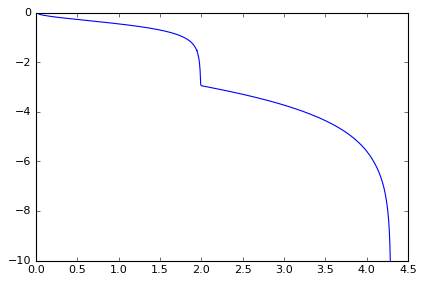

In [30]:
plt.plot(results.T[1], slopes)

# Bernoulli Source

So, I am not sure whether this actually works. I am going to try one of the channels for which I know the answer, and see if I get the right results

In [2]:
import blahut as b

In [7]:
import imp

In [93]:
imp.reload(b)

<module 'blahut' from '/home/manolo/Philosophy/Writings/Papers/natural-kinds-rate-distortion-theory/python/blahut.py'>

In [94]:
bernoulli = dit.Distribution({'0': 1/2, '1': 1/2})

In [95]:
rdt = b.RDT(bernoulli, a=10,  b=.1, K=3000, epsilon=0.000001)

In [96]:
rdt.cover(30, None)

(0.04335317516634446, 0.37804119636389266)

In [97]:
rdt.blahutarimoto(30, None)

(0.043353175166344453, 0.37804119636389266, array([[ 0.6219588,  0.3780412],
        [ 0.3780412,  0.6219588]]), array([ 0.5,  0.5]))

In [50]:
rdt.update_conditional(rdt.calc_s(20), np.array([1/3, 2/3]))

array([[ 0.11440651,  0.88559349],
       [ 0.65930658,  0.34069342]])

In [39]:
output = np.array([1/3, 2/3])

In [40]:
rdt.update_conditional(rdt.calc_s(20), output)

array([[ 0.11440651,  0.88559349],
       [ 0.65930658,  0.34069342]])

In [19]:
(output * np.exp(-rdt.calc_s(20) * rdt.dist_matrix.T)).T

array([[ 0.33333333,  1.29012685],
       [ 2.58025369,  0.66666667]])

In [23]:
_19.sum(1)

array([ 1.62346018,  3.24692036])

In [26]:
(_19.T/_23).T

array([[ 0.20532277,  0.79467723],
       [ 0.79467723,  0.20532277]])

In [98]:
results = rdt.all_points(outputfile="bernoulli.csv", iterator=range(88))

In [99]:
results = np.fromfile("bernoulli.csv", sep=' ')

In [100]:
results = results.reshape(88, 3)

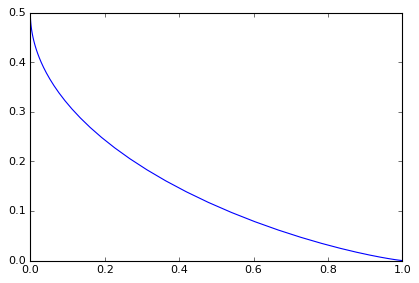

In [101]:
plt.plot(results.T[1], results.T[2])

In [35]:
def theoretica_Bernouilli(p, distortion):
    """
    Give the theoretical rate for a given distortion (from Cover and Thomas, p. 307)
    """
    if distortion > min(p, 1-p):
        return 0
    else:
        return dit.shannon.entropy(p) - dit.shannon.entropy(distortion)

In [36]:
theoretica_Bernouilli(0.25, 0.20)

0.089350029571770517

In [96]:
theor_results = [theoretica_Bernouilli(0.25, dist) for dist in np.arange(0.26, 0, -.001)]

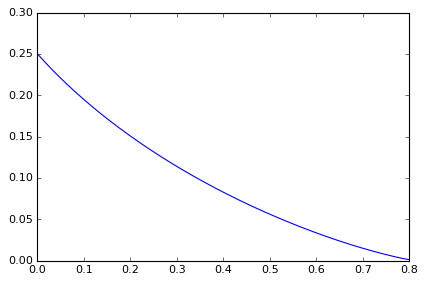

In [97]:
plt.plot( theor_results, np.arange(0.26, 0.0, -.001))

In [109]:
import BlahutArimoto as ba

In [111]:
rdt.dist_matrix

array([[0, 1],
       [1, 0]])

In [133]:
ba.BlahutArimato(rdt.dist_matrix, rdt.pmf, -rdt.calc_s(10))

(0.64458645389760905, 0.024628194477976949)

In [134]:
rdt.blahut(10, outputfile=None)

10


(0.024631374813906426, 0.68468374391954234)

In [127]:
rate

0.0017485602758021499

In [128]:
distortion

0.74945197784129702

In [123]:
rdt.calc_s(300)

-9.3576229688401746e-13

In [139]:
imp.reload(b)

<module 'blahut' from '/home/manolo/Philosophy/Writings/Papers/natural-kinds-rate-distortion-theory/python/blahut.py'>

In [144]:
rdt.BlahutArimato(20)

(0.078843699414940835, 0.20531646247523286)

In [145]:
rdt.blahut(20, outputfile=None)

20


(0.20532096169972405, 0.20184685780077605)

In [147]:
theoretica_Bernouilli(.75, 0.20531646247523286)

0.078843699310143012